# Problem Set 1 - Working with Datasets and Exploring Pandas and Plots

__TA__: _Madhumitha Saksthi_ <br>
__Instructor__: _Ramesh Yerraballi_ <br>
__Semester__: _Fall 2019_

This problem set consist of 5 problems in total. The first two problems would give you an insight on using pandas. The next problem will focus on cleaning the dataset for missing datapoints. Finally, the last two problems would involve generating graphs based on the traffic dataset. 

This exercise discovers an extensive dataset on the subject of traffic on German roads provided by the BASt. It holds detailed numbers of cars, trucks and other vehicle groups passing more than 1,500 automatic counting stations. This dataset records for each counting station are provided on an hourly basis and they reach back to the year 2003.

We will explore some new insights about the data given.

Note for checking the code: 
1. Please be sure to provide relative path in all places where you are loading data from a location.
2. Give clear spacing and comments for the solution code. 
3. If there is error running the code, points will be deducted. So, please submit a working code. 

# Import Libraries and Download data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from datetime import datetime as dt

# download file from http://www.bast.de/videos/2016_A_S.zip
df = pd.read_csv(r'ProblemSet1/2016_A_S.txt', sep=';')

colors = ['#2678B2', '#AFC8E7', '#FD7F28', '#FDBB7D', 
          '#339E34', '#9ADE8D', '#D42A2F', '#FD9898', 
          '#9369BB', '#C5B1D4', '#8B564C', '#C39C95', 
          '#E179C1', '#F6B7D2', '#7F7F7F', '#C7C7C7']

In [2]:
#extract required columns and translate column names to English
df = df[['Zst', 'Land', 'KFZ_R1', 'KFZ_R2', 'Datum', 'Stunde']]
df.columns = ['nr', 'land', 'cars_r1', 'cars_r2', 'date', 'hour']

## Pandas: exercise 1
In this exercise, print the data frame and you will notice that the format in which date has been provided as 161231 for 2016-12-31. Write a one liner code to convert the 'date' to DateTime format.The resulting date should appear as '2016-01-01 01:00:00' based on your code.  

In [3]:
# convert values in 'date' column to DateTime
df.loc[df.hour == 24, 'hour'] = 0
#### your code here ######
df['date'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['hour'].astype(str), format='%y%m%d %H')

In [4]:
df.dtypes

nr                  int64
land                int64
cars_r1             int64
cars_r2             int64
date       datetime64[ns]
hour                int64
dtype: object

In [5]:
df.head(25)

,nr,land,cars_r1,cars_r2,date,hour
0,4382,16,16,10,2016-01-01 01:00:00,1
1,4382,16,32,26,2016-01-01 02:00:00,2
2,4382,16,17,31,2016-01-01 03:00:00,3
3,4382,16,11,24,2016-01-01 04:00:00,4
4,4382,16,16,21,2016-01-01 05:00:00,5
5,4382,16,15,25,2016-01-01 06:00:00,6
6,4382,16,21,21,2016-01-01 07:00:00,7
7,4382,16,11,10,2016-01-01 08:00:00,8
8,4382,16,22,22,2016-01-01 09:00:00,9
9,4382,16,40,39,2016-01-01 10:00:00,10


## Pandas: exercise 2
In this exercise, based on the total sum across time for each land, print the land parameter with the maximum traffic. You would be using boolean indexing to indetify the land with the maximum traffic.Typically, you should be identifying the land with maximum traffic as one among the 16 values. 

In [6]:
df_sum = df
df_sum['sum'] = df_sum['cars_r1'] + df_sum['cars_r2']
#df_byday_sum = df_sum.set_index('date').groupby(['land',pd.Grouper(freq = 'D')])[['sum']].sum().reset_index()
df_byday_sum = df_sum.set_index('date').groupby(['land', pd.TimeGrouper('D')])[['sum']].sum().reset_index()
#### your code here###
#land with maximum traffic for single day
df_byday_sum.loc[df_byday_sum['sum'] == max(df_byday_sum['sum'])]

C:\Users\Green\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  after removing the cwd from sys.path.


,land,date,sum
2772,9,2016-07-29,18445463


In [7]:
#land with maximum traffic in total
df_sum1 = df
df_sum1['sum'] = df_sum1['cars_r1'] + df_sum1['cars_r2']
df_total_sum = df_sum1.set_index('date').groupby(['land',pd.Grouper(freq = 'y')])[['sum']].sum().reset_index()
df_total_sum.loc[df_total_sum['sum'] == max(df_total_sum['sum'])]

,land,date,sum
7,9,2016-12-31,5066695150


### So the land with maximum traffic is land 9 in both daily traffic and total traffic.

## Missing: exercise 3
The code below will randomly generate index and remove the data point from those index. Using a technique of filling missing data, we will try to recover the lost data in the following exercise. 

In [8]:
# Generate random indexes 
import random
import numpy as np
index = []
for x in range(1000):
    index.append(random.randint(1,7273152))
index = np.unique(index)
df_missing = df
df_missing.loc[index,'cars_r1'] = np.nan
df_missing.loc[index,'cars_r2'] = np.nan

In [9]:
#When you print the dataframe you will notice that the values are set to NaN. 
print(df_missing.loc[index])

           nr  land  cars_r1  cars_r2                date  hour   sum
2381     4382    16      NaN      NaN 2016-04-09 06:00:00     6   143
5569     4382    16      NaN      NaN 2016-08-20 02:00:00     2   111
15636    4334    16      NaN      NaN 2016-10-12 13:00:00    13   867
20543    4346    16      NaN      NaN 2016-05-03 00:00:00     0   131
22003    4346    16      NaN      NaN 2016-07-03 20:00:00    20  1025
24481    4346    16      NaN      NaN 2016-10-15 02:00:00     2    90
31386    4345    16      NaN      NaN 2016-07-28 19:00:00    19  1692
53023    4330    16      NaN      NaN 2016-01-14 08:00:00     8  1496
54246    4330    16      NaN      NaN 2016-03-05 07:00:00     7   319
68525    4342    16      NaN      NaN 2016-10-20 06:00:00     6   703
71406    4341    16      NaN      NaN 2016-02-17 07:00:00     7  1708
84505    4340    16      NaN      NaN 2016-08-15 02:00:00     2   134
87693    4340    16      NaN      NaN 2016-12-25 22:00:00    22   297
88559    4372    16 

# 3.1
In what conditions should NaN values be filled with mean and median? 
(Hint: Consider outliers in the data)

## We should fill NaN values with mean when the outliers are not that far away from most of the data points and fill NaN values with median when we have great outliers. 

In [10]:
#3.2 Write the code to drop the rows with missing values
df_missingone = df_missing.dropna()
print(df_missingone)

           nr  land  cars_r1  cars_r2                date  hour   sum
0        4382    16     16.0     10.0 2016-01-01 01:00:00     1    26
1        4382    16     32.0     26.0 2016-01-01 02:00:00     2    58
2        4382    16     17.0     31.0 2016-01-01 03:00:00     3    48
3        4382    16     11.0     24.0 2016-01-01 04:00:00     4    35
4        4382    16     16.0     21.0 2016-01-01 05:00:00     5    37
5        4382    16     15.0     25.0 2016-01-01 06:00:00     6    40
6        4382    16     21.0     21.0 2016-01-01 07:00:00     7    42
7        4382    16     11.0     10.0 2016-01-01 08:00:00     8    21
8        4382    16     22.0     22.0 2016-01-01 09:00:00     9    44
9        4382    16     40.0     39.0 2016-01-01 10:00:00    10    79
10       4382    16    117.0     90.0 2016-01-01 11:00:00    11   207
11       4382    16    186.0    177.0 2016-01-01 12:00:00    12   363
12       4382    16    241.0    197.0 2016-01-01 13:00:00    13   438
13       4382    16 

In [11]:
#3.3 Fill the value with the previous time stamp value
### your code here
df_missingtwo = df_missing.sort_values(by='date')
df_missingtwo = df_missingtwo.fillna(method='ffill')
print(df_missingtwo.loc[index])

           nr  land  cars_r1  cars_r2                date  hour   sum
2381     4382    16    225.0    216.0 2016-04-09 06:00:00     6   143
5569     4382    16    151.0    292.0 2016-08-20 02:00:00     2   111
15636    4334    16    994.0   1075.0 2016-10-12 13:00:00    13   867
20543    4346    16    415.0    440.0 2016-05-03 00:00:00     0   131
22003    4346    16    321.0    383.0 2016-07-03 20:00:00    20  1025
24481    4346    16    292.0    422.0 2016-10-15 02:00:00     2    90
31386    4345    16   1803.0   1949.0 2016-07-28 19:00:00    19  1692
53023    4330    16   2707.0   2198.0 2016-01-14 08:00:00     8  1496
54246    4330    16    132.0    148.0 2016-03-05 07:00:00     7   319
68525    4342    16    737.0    807.0 2016-10-20 06:00:00     6   703
71406    4341    16    334.0    157.0 2016-02-17 07:00:00     7  1708
84505    4340    16    168.0    128.0 2016-08-15 02:00:00     2   134
87693    4340    16    173.0    192.0 2016-12-25 22:00:00    22   297
88559    4372    16 

In [12]:
#3.4 Fill the value with a constant 
### your code here
df_missingthree = df_missing 
df_missingthree = df_missingthree.fillna(999)
print(df_missingthree.loc[index])

           nr  land  cars_r1  cars_r2                date  hour   sum
2381     4382    16    999.0    999.0 2016-04-09 06:00:00     6   143
5569     4382    16    999.0    999.0 2016-08-20 02:00:00     2   111
15636    4334    16    999.0    999.0 2016-10-12 13:00:00    13   867
20543    4346    16    999.0    999.0 2016-05-03 00:00:00     0   131
22003    4346    16    999.0    999.0 2016-07-03 20:00:00    20  1025
24481    4346    16    999.0    999.0 2016-10-15 02:00:00     2    90
31386    4345    16    999.0    999.0 2016-07-28 19:00:00    19  1692
53023    4330    16    999.0    999.0 2016-01-14 08:00:00     8  1496
54246    4330    16    999.0    999.0 2016-03-05 07:00:00     7   319
68525    4342    16    999.0    999.0 2016-10-20 06:00:00     6   703
71406    4341    16    999.0    999.0 2016-02-17 07:00:00     7  1708
84505    4340    16    999.0    999.0 2016-08-15 02:00:00     2   134
87693    4340    16    999.0    999.0 2016-12-25 22:00:00    22   297
88559    4372    16 

In [13]:
#3.5 Fill the value with the mean of value above and below the datapoint 
### your code here
df_missingfour = df_missing

for x in index:
    df_missingfour.loc[x,'cars_r1'] = (df_missingfour.loc[x-1,'cars_r1']+df_missingfour.loc[x+1,'cars_r1'])/2
    df_missingfour.loc[x,'cars_r2'] = (df_missingfour.loc[x-1,'cars_r2']+df_missingfour.loc[x+1,'cars_r2'])/2
    
print(df_missingfour.loc[index])

           nr  land  cars_r1  cars_r2                date  hour   sum
2381     4382    16     65.0     71.5 2016-04-09 06:00:00     6   143
5569     4382    16     57.0     64.5 2016-08-20 02:00:00     2   111
15636    4334    16    433.0    431.0 2016-10-12 13:00:00    13   867
20543    4346    16     87.5     81.0 2016-05-03 00:00:00     0   131
22003    4346    16    386.0    670.0 2016-07-03 20:00:00    20  1025
24481    4346    16     63.0     55.5 2016-10-15 02:00:00     2    90
31386    4345    16    995.5    694.5 2016-07-28 19:00:00    19  1692
53023    4330    16    563.5    684.0 2016-01-14 08:00:00     8  1496
54246    4330    16    173.5    217.0 2016-03-05 07:00:00     7   319
68525    4342    16    487.5    413.5 2016-10-20 06:00:00     6   703
71406    4341    16    882.0    839.5 2016-02-17 07:00:00     7  1708
84505    4340    16     48.5     81.5 2016-08-15 02:00:00     2   134
87693    4340    16    129.0    158.0 2016-12-25 22:00:00    22   297
88559    4372    16 

## Plot: exercise 4

# Plot linechart of number of cars_r1 and cars_r2 vs date with different colors and legend.

Using the `station` and `station_days`. Analyze what station and station_days represent and how they should be used. It is pretty straight forward.
The plots have been generated and given below for your reference. The code writtern should generate similar graphs. 

In [14]:
grouped_by_name = df.groupby(['nr'])

number = 1177
station = grouped_by_name.get_group(number)
station_days = station.set_index('date').groupby([pd.Grouper(freq = 'D')])[['cars_r1', 'cars_r2']].sum().reset_index()

<Figure size 432x288 with 0 Axes>

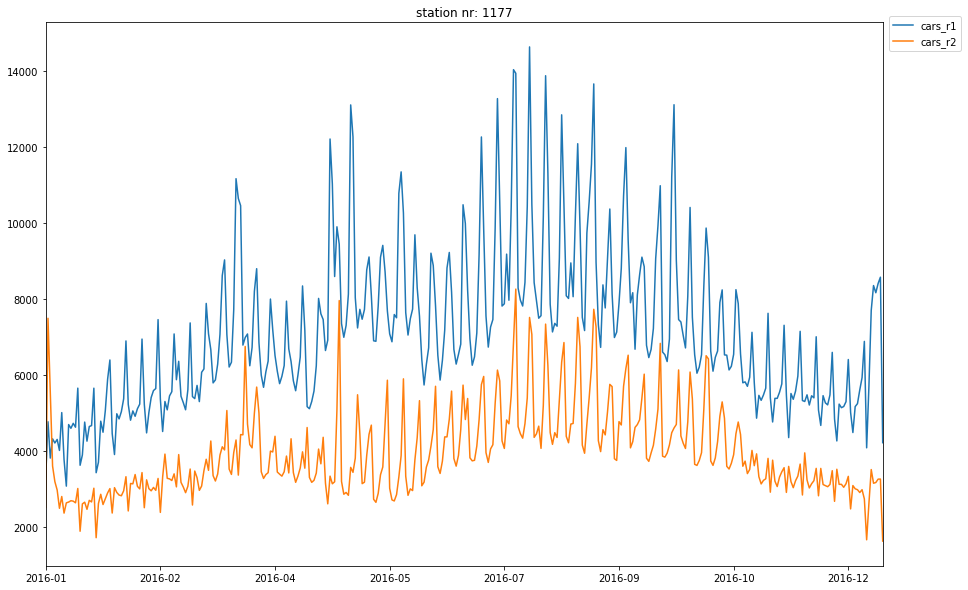

In [15]:
#from IPython.display import Image
#Image(filename=r'ProblemSet1/plot1.png')
station_days['date'] = station_days['date'].dt.strftime('%Y-%m')
plt.figure()
chart = station_days.plot(x='date',y=['cars_r1','cars_r2'],title="station nr: 1177",figsize=(15,10))
#chart.xaxis.set_major_formatter(FuncFormatter(date_formatter))
chart.xaxis.set_label_text("")
plt.legend(loc="upper right",bbox_to_anchor=(1.1, 1.02))

## Plot exercise 5

## Scatterplot: Top 3 busiest days per state

In [16]:
df_scatter = df
df_scatter['sum'] = df_scatter['cars_r1'] + df_scatter['cars_r2']
df_byday = df_scatter.set_index('date').groupby(['land', pd.TimeGrouper('D')])[['sum']].sum().reset_index()
df_sorted = df_byday.sort_values(by=['sum'], ascending=False)
df_clean = df_sorted.groupby(['land']).head(3)

C:\Users\Green\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  This is separate from the ipykernel package so we can avoid doing imports until


# Plot the different group of land vs date and show the 3 busiest days using the above DataFrames generated.

You have to just write one line inside the for loop and plot.

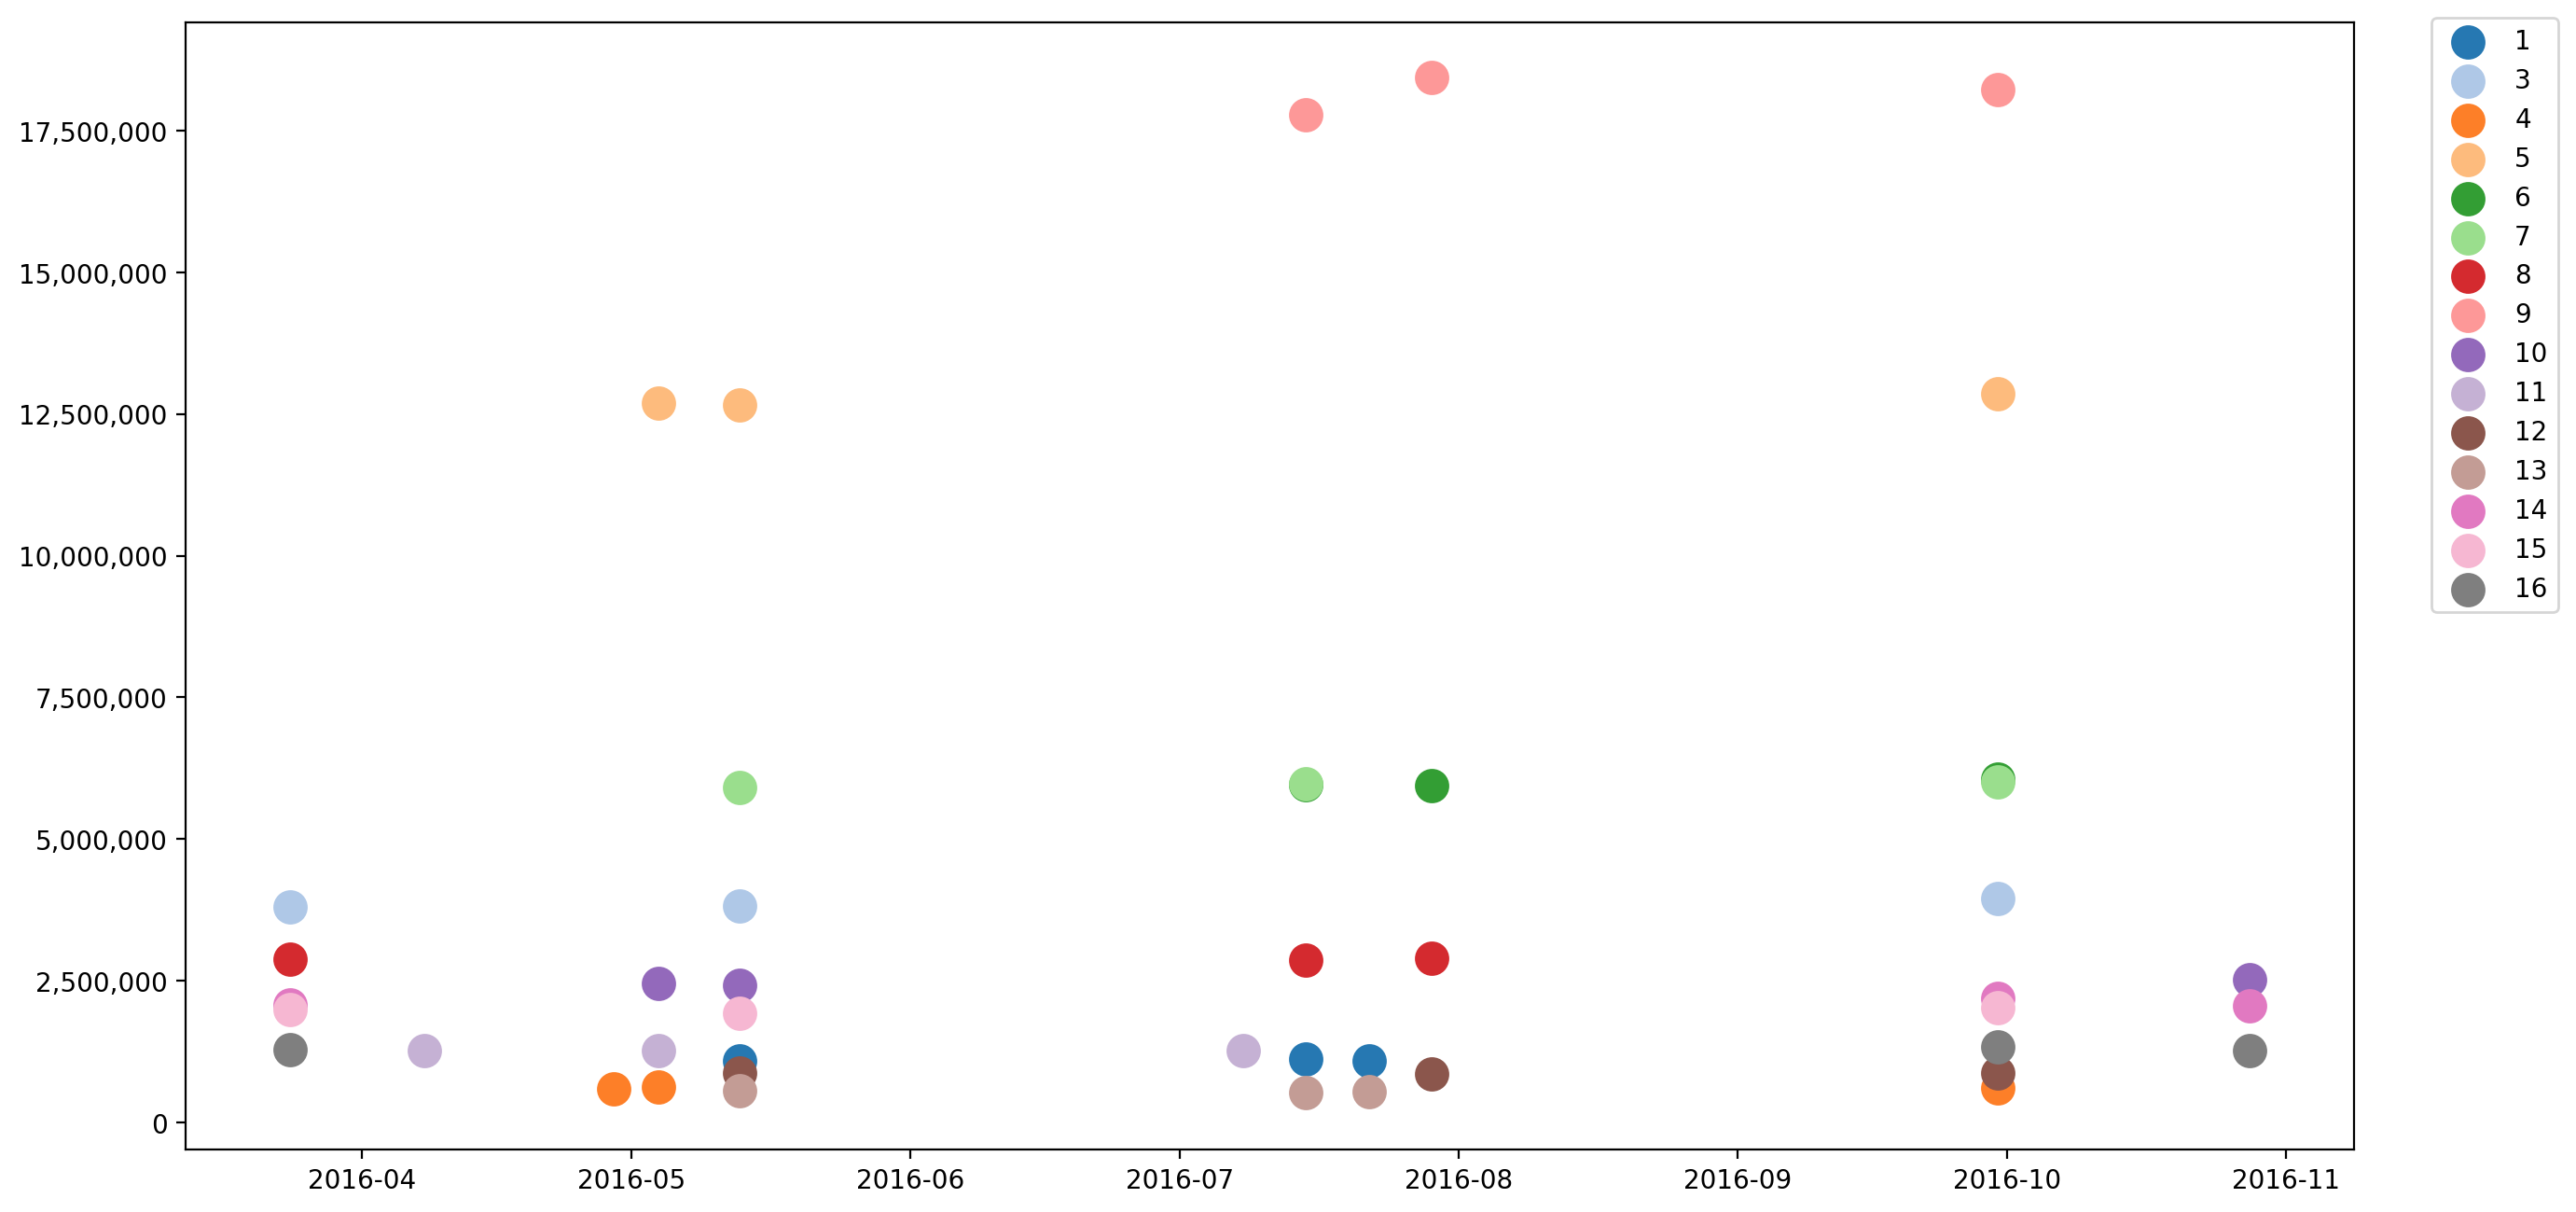

In [17]:
groups = df_clean.groupby('land')
scatter_colors = iter(colors)

fig, ax = plt.subplots(figsize=(15, 8), dpi=200)
for name, group in groups:
    dates = group['date'].dt.strftime('%Y-%m-%d').values
    dates = [pd.to_datetime(d) for d in dates]
    plt.scatter(group['date'],group['sum'],label=name,c=next(scatter_colors),marker='o',s=150)
    # line to insert here for to plot.

#plt.legend()
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.015))
plt.show()